In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

import pandas as pd

from sklearn.decomposition import PCA
from sklearn import decomposition

from sklearn.cluster import AgglomerativeClustering as AC
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Partie test + vérification des données

In [2]:
file_path='sujet_07_fichier1.csv'
# Load the CSV as a NumPy array, skipping the first row and first column
################################################
data = np.loadtxt(file_path, delimiter=",", usecols=range(0, np.genfromtxt(file_path, delimiter=",", max_rows=1).size))
#################################################
# data = np.loadtxt(file_path, delimiter=",", skiprows=1, usecols=range(0, 20))
# Load the gene names (first column, skipping the first row)
# gene_names = np.genfromtxt(file_path, delimiter=",", dtype=str, skip_header=1, usecols=0)
# gene_names = np.char.strip(gene_names, '"')
# print(gene_names[:10])

# Transpose data to end up with :
# cells in lines and features in columns
data=data.T
[Ngene,Ncell]=data.shape
print('num genes :',Ngene , "num cells :", Ncell)
print(np.shape(data))

num genes : 18044 num cells : 500
(18044, 500)


In [3]:
liste_genes = np.array([f"gène{i}" for i in range(1, Ngene+1)])
print(liste_genes)

['gène1' 'gène2' 'gène3' ... 'gène18042' 'gène18043' 'gène18044']


In [4]:
# Trouver les indices où data est NaN
nan_indices = np.argwhere(np.isnan(data))

# Afficher les 10 premiers
print("Positions des 10 premières valeurs NaN :")
print(nan_indices[:10])

Positions des 10 premières valeurs NaN :
[]


In [5]:
data_scaled = np.zeros_like(data)
for ligne in range(Ngene):
    ligne_data = data[ligne, :]
    mean = np.mean(ligne_data)
    std = np.std(ligne_data)
    
    if std != 0:
        data_scaled[ligne, :] = (ligne_data - mean) / std
    else:
        data_scaled[ligne, :] = ligne_data

data_scaled=data_scaled.T

In [6]:
# Trouver les indices où data est NaN
nan_indices = np.argwhere(np.isnan(data_scaled))

# Afficher les 10 premiers
print("Positions des 10 premières valeurs NaN :")
print(nan_indices[:10])
print(np.shape(data_scaled))

Positions des 10 premières valeurs NaN :
[]
(500, 18044)


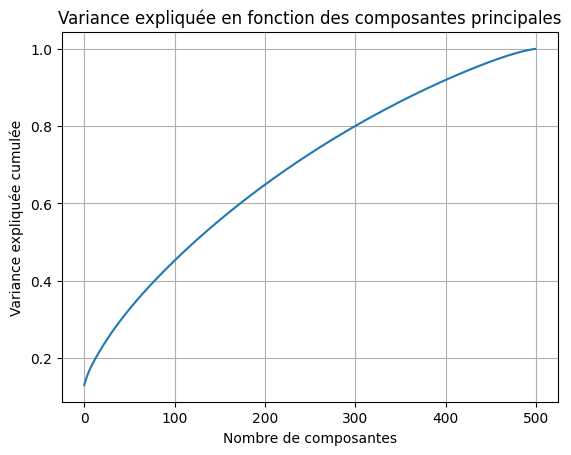

In [7]:
pca = PCA()
pca.fit(data_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée en fonction des composantes principales')
plt.grid(True)
plt.show()

pca_obj=PCA(n_components=500)
pca_obj.fit(data_scaled)
DATAout=pca_obj.transform(data_scaled)

Fichier 1 : 18044 gènes, 500 cellules
Fichier 2 : 18044 gènes, 500 cellules
Fichier 3 : 18044 gènes, 500 cellules


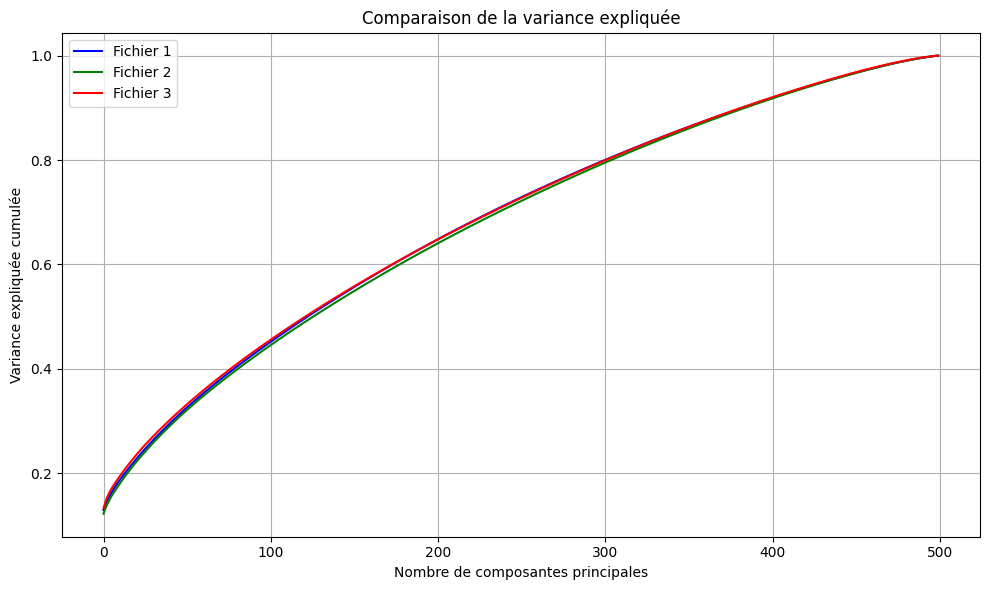

In [8]:
file_paths = ['sujet_07_fichier1.csv', 'sujet_07_fichier2.csv', 'sujet_07_fichier3.csv']
labels = ['Fichier 1', 'Fichier 2', 'Fichier 3']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))

for idx, file_path in enumerate(file_paths):
    # Chargement complet (robuste même si le fichier change de taille)
    data = np.loadtxt(file_path, delimiter=",", usecols=range(0, np.genfromtxt(file_path, delimiter=",", max_rows=1).size))
    data = data.T  # gènes en lignes, cellules en colonnes
    Ngene, Ncell = data.shape
    print(f"{labels[idx]} : {Ngene} gènes, {Ncell} cellules")

    # Centrage-réduction par gène
    data_scaled = np.zeros_like(data)
    for ligne in range(Ngene):
        ligne_data = data[ligne, :]
        mean = np.mean(ligne_data)
        std = np.std(ligne_data)
        if std != 0:
            data_scaled[ligne, :] = (ligne_data - mean) / std
        else:
            data_scaled[ligne, :] = 0

    data_scaled = data_scaled.T  # cellules en lignes, gènes en colonnes

    pca = PCA()
    pca.fit(data_scaled)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), label=labels[idx], color=colors[idx])

plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Comparaison de la variance expliquée')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Partie redimensionnement et classification

## Données séparés


=== Traitement de Fichier 1 ===


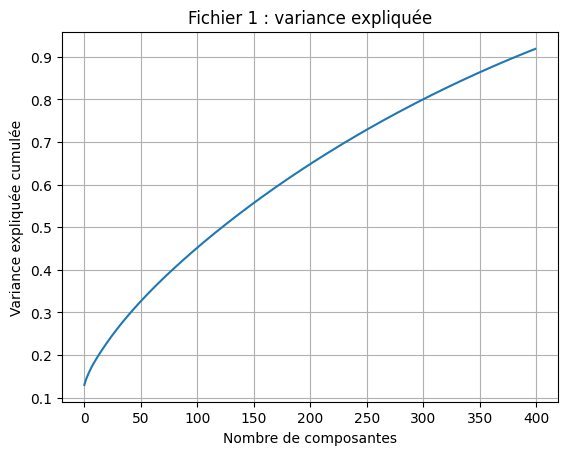

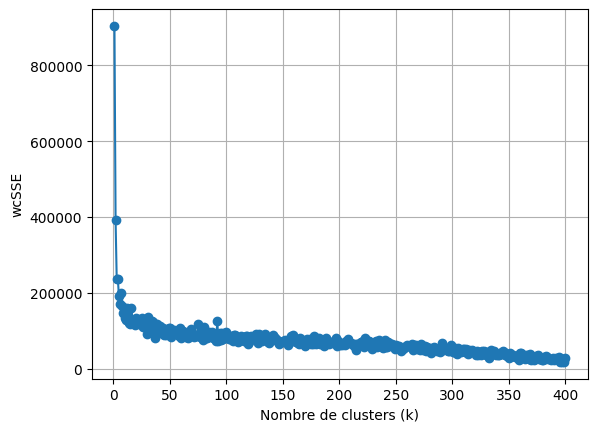

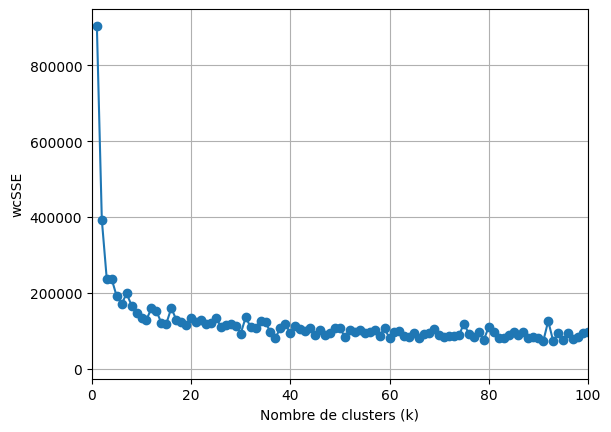


=== Traitement de Fichier 2 ===


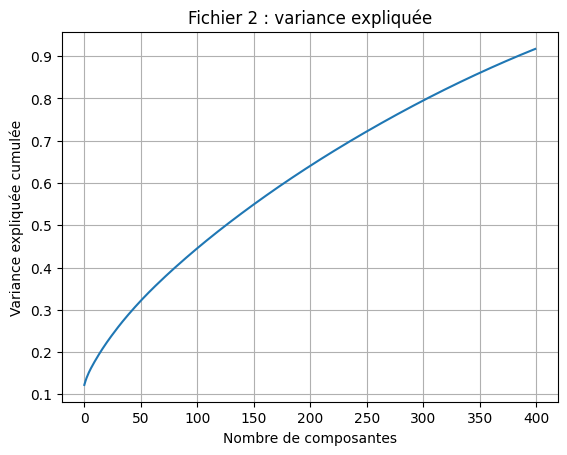

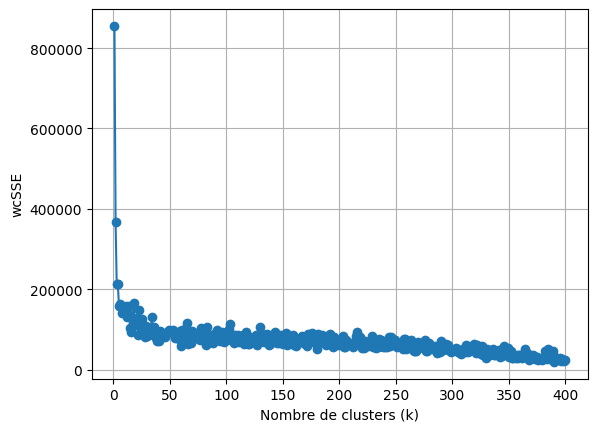

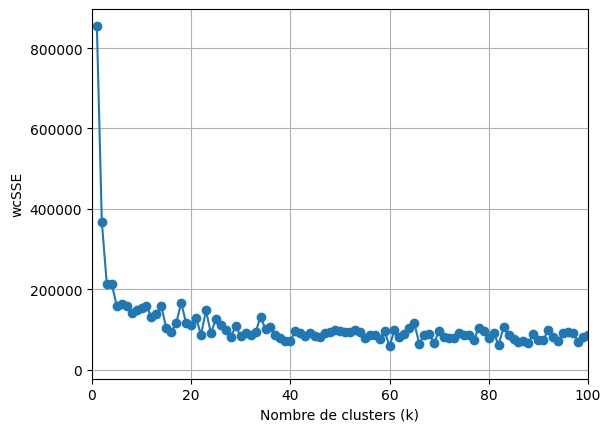


=== Traitement de Fichier 3 ===


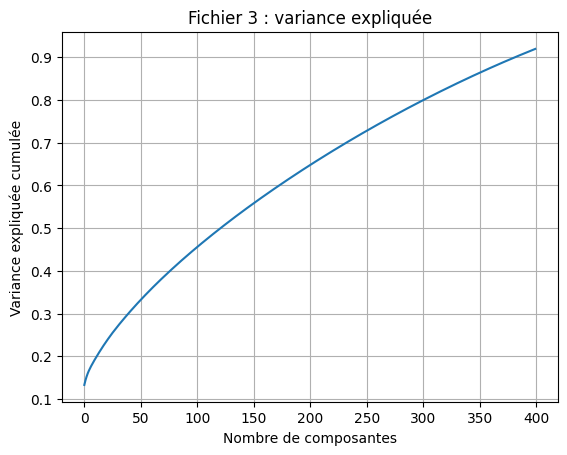

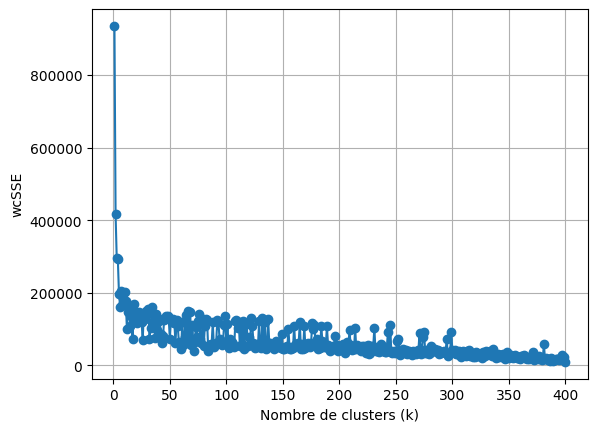

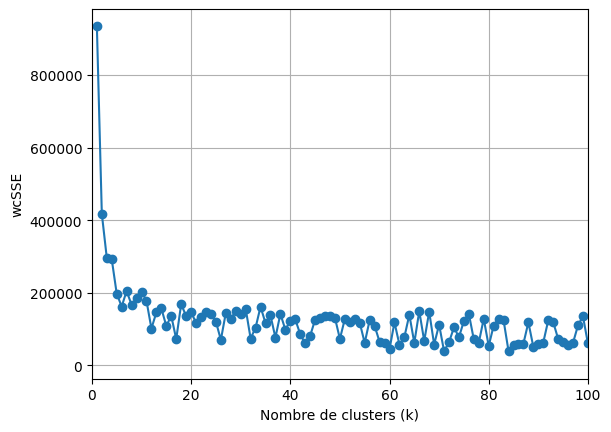

In [10]:
# 1. Chargement des fichiers
file_paths = ['sujet_07_fichier1.csv', 'sujet_07_fichier2.csv', 'sujet_07_fichier3.csv']
labels_text = ['Fichier 1', 'Fichier 2', 'Fichier 3']

Nrepeat = 10
kmax = 400

for file_idx, file_path in enumerate(file_paths):
    print(f"\n=== Traitement de {labels_text[file_idx]} ===")

    # Chargement des données
    data = np.loadtxt(file_path, delimiter=",", usecols=range(0, np.genfromtxt(file_path, delimiter=",", max_rows=1).size))
    data = data.T  # Gènes en lignes, cellules en colonnes
    Ngene, Ncell = data.shape

    # 2. Centrage-réduction
    data_scaled = np.zeros_like(data)
    for ligne in range(Ngene):
        ligne_data = data[ligne, :]
        mean = np.mean(ligne_data)
        std = np.std(ligne_data)
        data_scaled[ligne, :] = (ligne_data - mean) / std if std != 0 else 0
    data_scaled = data_scaled.T  # Cellules en lignes, gènes en colonnes

    # 3. ACP sur ce fichier
    pca_obj=PCA(n_components=400)
    pca_obj.fit(data_scaled)
    DATAout_scaled=pca_obj.transform(data_scaled)

    # 4. Choix du nombre de composantes pertinentes (affichage)
    plt.figure()
    plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))
    plt.xlabel("Nombre de composantes")
    plt.ylabel("Variance expliquée cumulée")
    plt.title(f"{labels_text[file_idx]} : variance expliquée")
    plt.grid(True)
    plt.show()

    
    NL,NC=np.shape(DATAout_scaled)

    
    DATA=np.zeros((NL,NC),dtype=float)
    for l in range(NL):
        for c in range(NC):
            DATA[l][c]=DATAout_scaled[l][c]
    np.shape(DATA)
    
    models_wcSSE=np.zeros(kmax)
    k_list=np.zeros(kmax)
    
    for i in range(kmax):
        k=i+1
        k_list[i]=k
        kmeans = KMeans(init="random",\
                    n_clusters=k,\
                    n_init=Nrepeat,\
                    max_iter=300)
        kmeans.fit(DATA)
        kmeans2 = KMeans(init="random",\
                    n_clusters=k,\
                    n_init=Nrepeat,\
                    max_iter=300)
        preds2=kmeans2.fit_predict(DATA)
        # get labels
        labels=kmeans.labels_
        centers=kmeans.cluster_centers_
        # will split according to labels
        # will compute dissimilarity
        L=np.empty(k,object)
        wcSSE=0
        for clu in range(k):
            #XY= np.array([], dtype=np.float).reshape(0,2)
            XY=[]
            # measure cluster variability SSE
            Xc=centers[clu,0]
            Yc=centers[clu,1]
            SSE=0
            for p in range(NL):
                if labels[p]==clu:
                    #XY=np.vstack((XY,[[DATA[p,0],DATA[p,1]]]))
                    XY.append([DATA[p,0],DATA[p,1]])
                    SSE=SSE+pow(DATA[p,0]-Xc,2)+pow(DATA[p,1]-Yc,2)
            L[clu]=XY
            wcSSE=wcSSE+SSE

        models_wcSSE[i]=wcSSE
        
    # Affichage des critères
    plt.figure()
    plt.plot(k_list, models_wcSSE, 'o-', label='Elbow (wcSSE)')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("wcSSE")
    plt.grid(True)
    plt.show()

    # Affichage des critères
    plt.figure()
    plt.plot(k_list, models_wcSSE, 'o-', label='Elbow (wcSSE)')
    plt.xlim(0, 100)
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("wcSSE")
    plt.grid(True)
    plt.show()

## Données concaténés

In [11]:
file_paths = ['sujet_07_fichier1.csv', 'sujet_07_fichier2.csv', 'sujet_07_fichier3.csv']
replicat_labels = [0, 1, 2]  # Pour suivre l’origine de chaque ligne après concaténation

all_data = []
all_labels = []

for idx, file_path in enumerate(file_paths):
    data = np.loadtxt(file_path, delimiter=",", usecols=range(0, np.genfromtxt(file_path, delimiter=",", max_rows=1).size))
    data = data.T  # gènes en lignes, cellules en colonnes
    Ngene, Ncell = data.shape

    # Centrage-réduction par gène
    data_scaled = np.zeros_like(data)
    for ligne in range(Ngene):
        ligne_data = data[ligne, :]
        mean = np.mean(ligne_data)
        std = np.std(ligne_data)
        if std != 0:
            data_scaled[ligne, :] = (ligne_data - mean) / std
        else:
            data_scaled[ligne, :] = 0

    data_scaled = data_scaled.T  # cellules en lignes, gènes en colonnes

    all_data.append(data_scaled)
    all_labels.extend([replicat_labels[idx]] * data_scaled.shape[0])  # Trace de l'origine

# Concaténer tous les fichiers
X = np.vstack(all_data)
labels = np.array(all_labels)

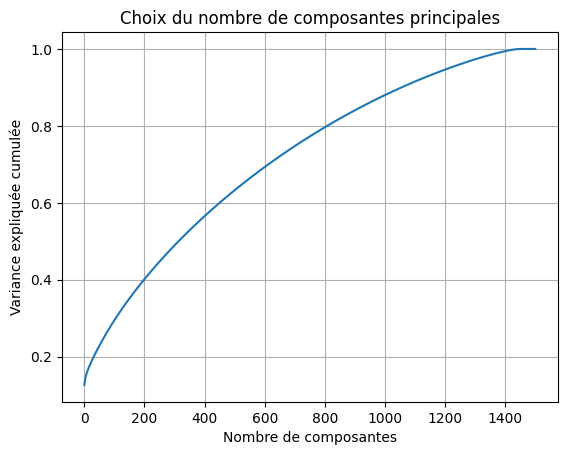

In [19]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Choix du nombre de composantes principales")
plt.grid(True)
plt.show()

C:\Users\todo\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\todo\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\todo\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\todo\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __ini

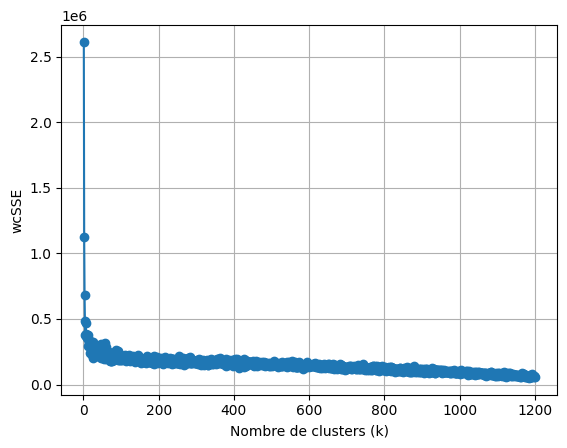

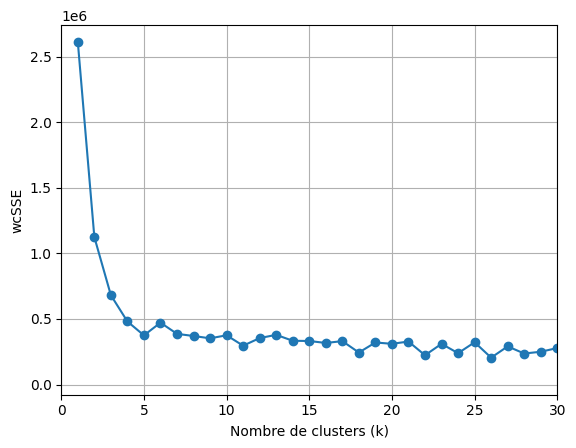

In [4]:
Nrepeat = 10
kmax = 1200

pca_obj=PCA(n_components=1200)
pca_obj.fit(X)
DATAout_scaled=pca_obj.transform(X)

NL,NC=np.shape(DATAout_scaled)

    
DATA=np.zeros((NL,NC),dtype=float)
for l in range(NL):
    for c in range(NC):
        DATA[l][c]=DATAout_scaled[l][c]
np.shape(DATA)

models_wcSSE=np.zeros(kmax)
k_list=np.zeros(kmax)

for i in range(kmax):
    k=i+1
    k_list[i]=k
    kmeans = KMeans(init="random",\
                n_clusters=k,\
                n_init=Nrepeat,\
                max_iter=300)
    kmeans.fit(DATA)
    kmeans2 = KMeans(init="random",\
                n_clusters=k,\
                n_init=Nrepeat,\
                max_iter=300)
    preds2=kmeans2.fit_predict(DATA)
    # get labels
    labels=kmeans.labels_
    centers=kmeans.cluster_centers_
    # will split according to labels
    # will compute dissimilarity
    L=np.empty(k,object)
    wcSSE=0
    for clu in range(k):
        #XY= np.array([], dtype=np.float).reshape(0,2)
        XY=[]
        # measure cluster variability SSE
        Xc=centers[clu,0]
        Yc=centers[clu,1]
        SSE=0
        for p in range(NL):
            if labels[p]==clu:
                #XY=np.vstack((XY,[[DATA[p,0],DATA[p,1]]]))
                XY.append([DATA[p,0],DATA[p,1]])
                SSE=SSE+pow(DATA[p,0]-Xc,2)+pow(DATA[p,1]-Yc,2)
        L[clu]=XY
        wcSSE=wcSSE+SSE

    models_wcSSE[i]=wcSSE

# Affichage des critères
plt.figure()
plt.plot(k_list, models_wcSSE, 'o-', label='Elbow (wcSSE)')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("wcSSE")
plt.grid(True)
plt.show()

# Affichage des critères
plt.figure()
plt.plot(k_list, models_wcSSE, 'o-', label='Elbow (wcSSE)')
plt.xlim(0, 30)
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("wcSSE")
plt.grid(True)
plt.show()

## Affichage des données sur le premier plan

In [14]:
colors = ['blue', 'green', 'red']
labels_text = ['Fichier 1', 'Fichier 2', 'Fichier 3']


for i in range(3):
    plt.figure()
    indices = labels == i
    plt.scatter(DATAout_scaled[indices, 0], DATAout_scaled[indices, 1], label=labels_text[i], color=colors[i], alpha=0.6)

    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.title("ACP : Visualisation des 3 réplicats")
    plt.legend()
    plt.grid(True)
    plt.show()

IndexError: boolean index did not match indexed array along axis 0; size of axis is 500 but size of corresponding boolean axis is 1500

<Figure size 640x480 with 0 Axes>